In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


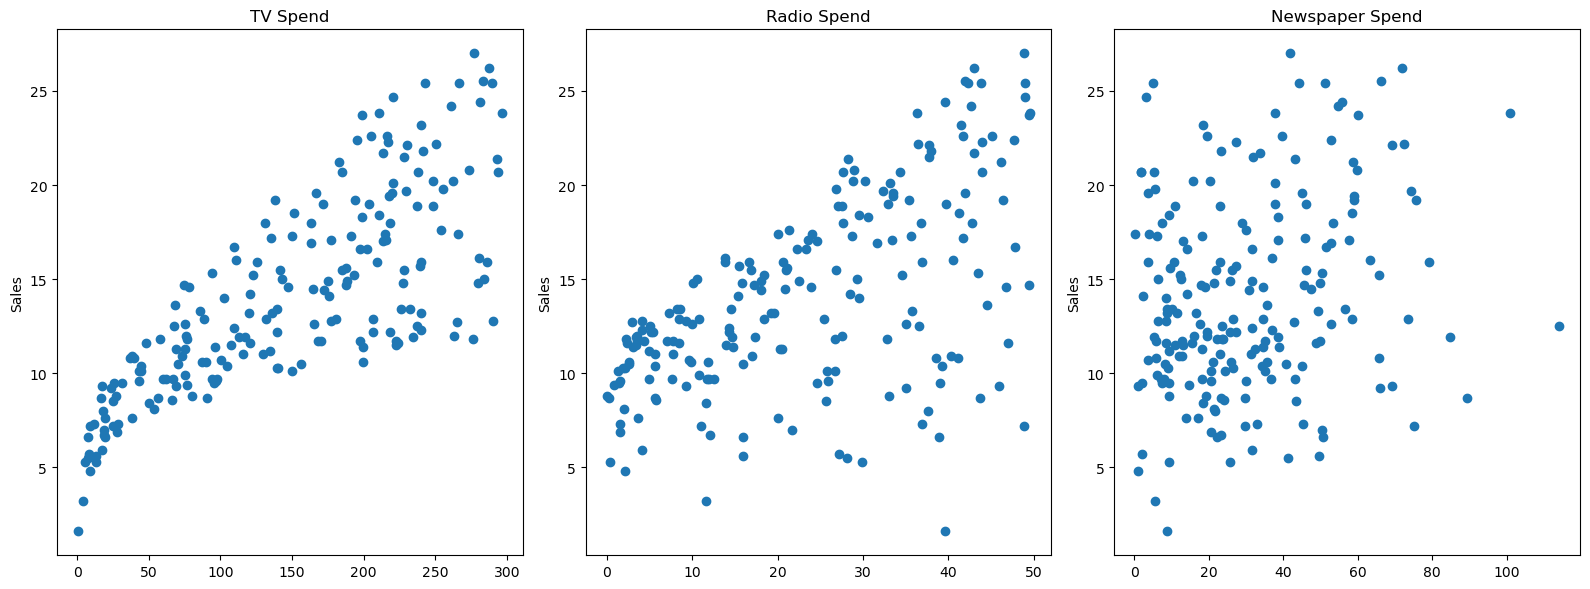

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

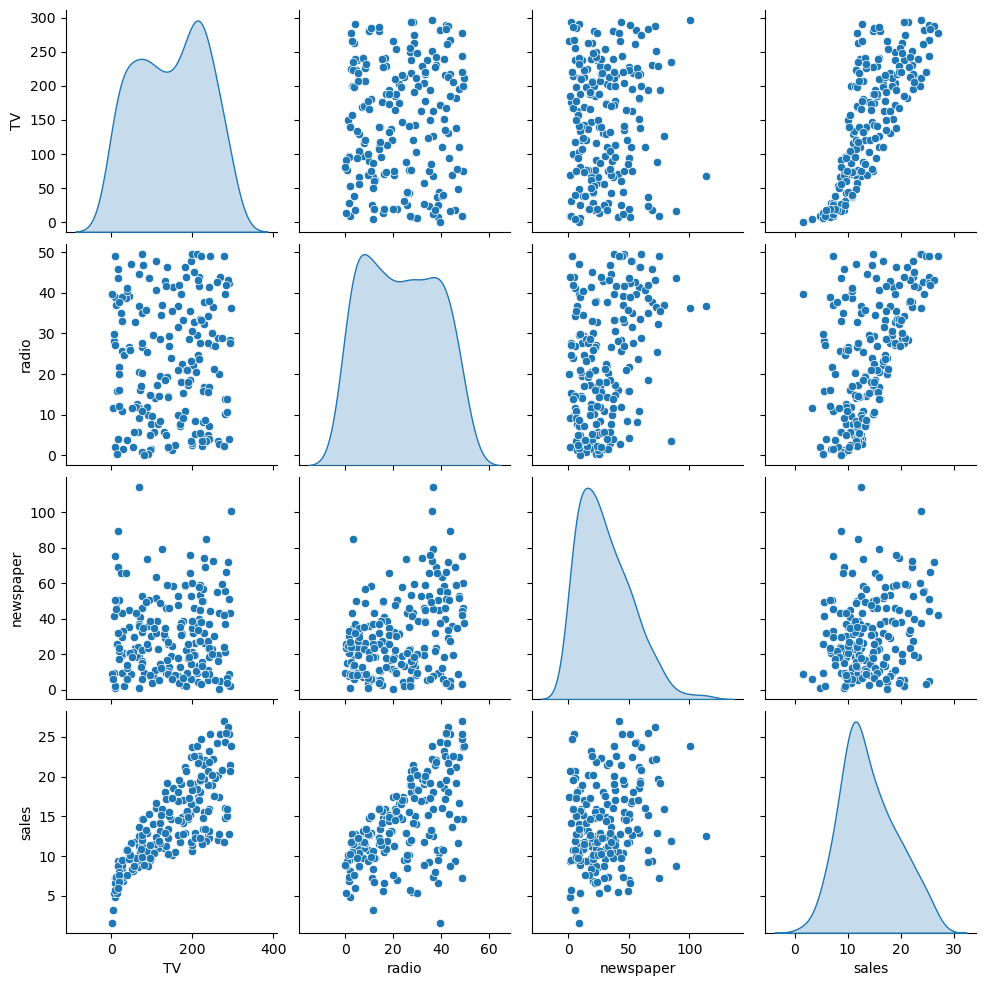

In [7]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [8]:
X = df.drop('sales',axis=1)
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (140, 3), Test size: (60, 3)


In [11]:
X_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [13]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
print(f"MAE: {MAE:0.2f}, MSE: {MSE:0.2f}, RMSE: {RMSE:0.2f}")

MAE: 1.21, MSE: 2.30, RMSE: 1.52


In [24]:
test_residuals = y_test - predictions

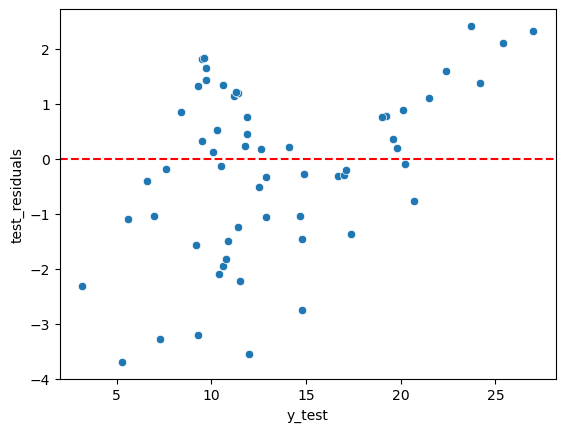

In [26]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.xlabel('y_test')
plt.ylabel('test_residuals')
plt.axhline(y = 0, color = 'red', ls = '--')

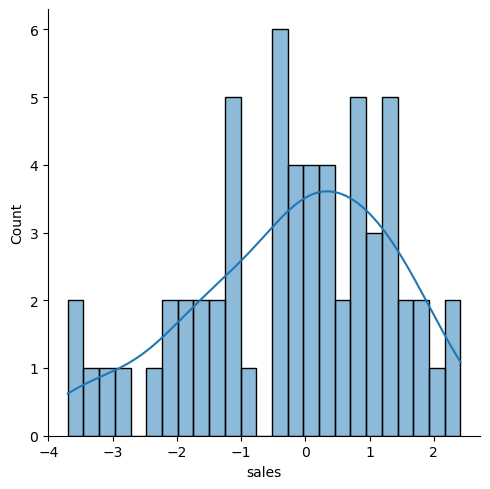

In [27]:
sns.displot(test_residuals, bins = 25, kde = True)

In [28]:
import scipy as sp

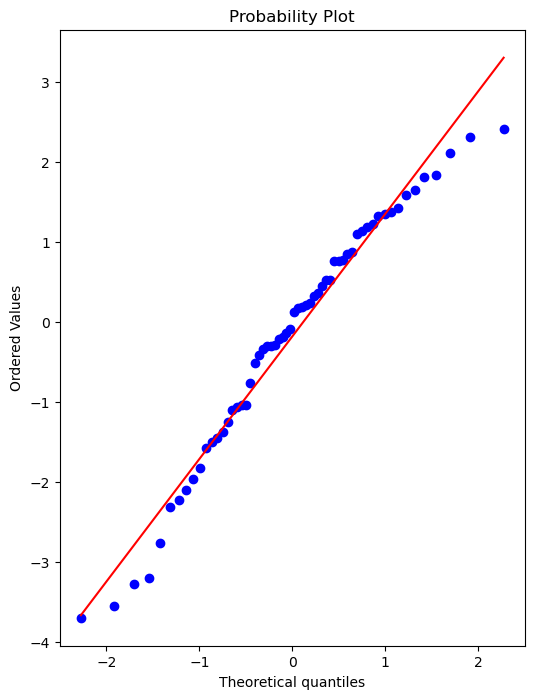

In [30]:
fig, ax = plt.subplots(figsize = (6, 8))
_ = sp.stats.probplot(test_residuals, plot = ax)

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(X, y)

LinearRegression()

In [33]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
y_hat = final_model.predict(X)

In [35]:
from joblib import dump, load

In [36]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [37]:
loaded_model = load('sales_model.joblib')

In [38]:
campaign = [[150, 30, 30]]
loaded_model.predict(campaign)

array([15.4283619])